In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

In [25]:
#OneR
df = pd.read_csv('D:\\CS 325 Data Mining\\Datasets\\archive\\Heart.csv')
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [31]:
X= df.iloc[:,1:14]
Y= df.iloc[:,-1]
df['ChestPain'].replace(['typical', 'nontypical', 'nonanginal', 'asymptomatic'], [1,2,3,4], inplace=True)
df['Thal'].replace(['normal', 'fixed', 'reversable'], [1,2,3], inplace=True)
df['AHD'].replace(['No', 'Yes'], [0,1], inplace=True)
df.replace('NA', np.nan, inplace = True)
df.replace(' ', np.nan, inplace = True)
df.dropna( inplace = True, how = 'any')
df = df[df.Thal != '.']
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,2.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,1.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,3.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,1.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1.0,0


In [32]:
best_features= SelectKBest(score_func=chi2, k=3)
fit= best_features.fit(X,Y)

In [33]:
df_scores= pd.DataFrame(fit.scores_)
df_columns= pd.DataFrame(X.columns)

In [34]:
features_scores= pd.concat([df_columns, df_scores], axis=1)
features_scores.columns= ['Features', 'Score']
features_scores.sort_values(by = 'Score')

,Features,Score
4,Fbs,0.002547
0,Sex,7.444195
9,Slope,7.828836
5,RestECG,8.134652
1,ChestPain,14.591587
2,RestBP,16.707463
3,Chol,20.855084
7,ExAng,35.508090
11,Thal,40.000301
8,Oldpeak,68.570533


In [35]:
X= df[['Ca', 'AHD', 'MaxHR']]
Y= df[['AHD']] 

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=100)

In [37]:
logreg= LogisticRegression()
logreg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [38]:
y_pred=logreg.predict(X_test)
print (X_test) #test dataset
print (y_pred) #predicted values

      Ca  AHD  MaxHR
223  2.0    1     95
140  0.0    0    164
226  0.0    0    143
177  1.0    1    105
232  3.0    1    126
..   ...  ...    ...
179  3.0    0    173
263  0.0    0    169
168  0.0    1    156
42   2.0    0    162
65   2.0    1    142

[119 rows x 3 columns]
[1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0
 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1
 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1
 1 1 1 0 0 1 0 1]


In [39]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
print('Recall: ',metrics.recall_score(y_test, y_pred, zero_division=1))
print('Precision:',metrics.precision_score(y_test, y_pred, zero_division=1))
print('CL Report:',metrics.classification_report(y_test, y_pred, zero_division=1))

Accuracy:  1.0
Recall:  1.0
Precision: 1.0
CL Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        54

    accuracy                           1.00       119
   macro avg       1.00      1.00      1.00       119
weighted avg       1.00      1.00      1.00       119



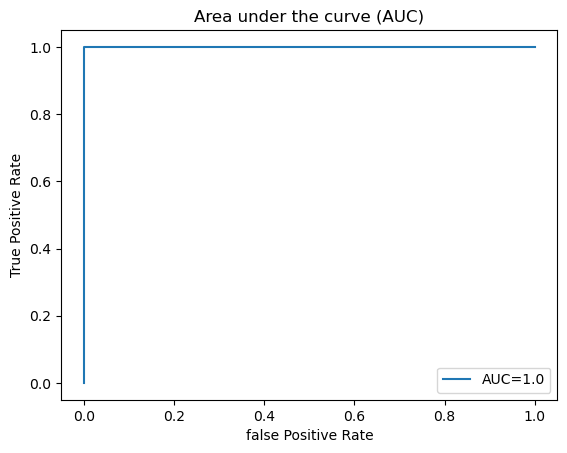

In [40]:
y_pred_proba= logreg.predict_proba(X_test) [::,1]
false_positive_rate, true_positive_rate, _ = metrics.roc_curve(y_test, y_pred_proba)
auc= metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(false_positive_rate, true_positive_rate,label="AUC="+str(auc))
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('false Positive Rate')
plt.title("Area under the curve (AUC)")
plt.legend(loc=4)